# 第三章：数据科学的数学基础

## 非线性规划

例1：求$\min z=(1-x_1)^2+100(x_2-x_1^2)^2$

In [24]:
%pip install scipy
from scipy.optimize import minimize
import numpy as np

def rosenbrock():
    v=lambda x:(1-x[0])**2+100*(x[1]-x[0]**2)**2
    return v

x0=np.array([0,3])#开始搜索最优值的初始点
result=minimize(rosenbrock(),x0)
print(result.x)#输出取得最优值时的[x0,x1]
print(result.fun)#输出最优值

Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 23.0 -> 23.1
[notice] To update, run: /Applications/Xcode.app/Contents/Developer/usr/bin/python3 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.
[0.99999554 0.99999105]
1.9956580947116778e-11


例2：求$\min z=(1-x_1)^2+100(x_2-x_1^2)^2$

$$
s.t.\begin{equation}
\begin{cases}
    -3x_1-4x2\ge -12\\
	-x_1+2x_2\ge -2\\
	x_1\ge 0\\
	x_2\ge 0\\
\end{cases}
\end{equation}
$$

## 线性规划

例3：求$\min z=-2x_1-x_2$

$$
s.t.\begin{cases}
 	-3x_1-4x2\ge -12\\
 	-x_1+2x_2\ge -2\\
 	x_1\ge 0\\
 	x_2\ge 0\\
\end{cases}
$$
可以用scipy.optimize或pulp包实现

In [25]:
#解一：scipy.optimize实现
from scipy.optimize import minimize

def rosenbrock():
    v=lambda x:(1-x[0])**2+100*(x[1]-x[0]**2)**2
    return v

x0=np.array([0,3])
cons=(
{'type':'ineq','fun':lambda x:-3*x[0]-4*x[1]+12},
{'type':'ineq','fun':lambda x:-x[0]+2*x[1]+2},
{'type':'ineq','fun':lambda x:x[0]},
{'type':'ineq','fun':lambda x:x[1]})#注意：限制条件都默认是>=,要手动标准化
result=minimize(rosenbrock(),x0,
constraints=cons)
print(result)

 message: Optimization terminated successfully
 success: True
  status: 0
     fun: 7.108906066299667e-08
       x: [ 1.000e+00  1.000e+00]
     nit: 20
     jac: [ 5.830e-03 -2.679e-03]
    nfev: 66
    njev: 20


In [26]:
#解二：pulp包实现
! pip install pulp
from pulp import *
# 创建问题实例
prob = LpProblem("linear_programming_problem", LpMinimize)
# 创建变量
x1 = LpVariable("x1", lowBound=0)#x1>=0
x2 = LpVariable("x2", lowBound=0)#x2>=0
# 设置目标函数
prob += -2 * x1 - x2
# 添加约束条件
prob += -3 * x1 + -4 * x2 >= -12
prob += -x1 + 2 * x2 >= -2
# 解决问题
status = prob.solve()
# 输出结果
print("x1 =", value(x1))
print("x2 =", value(x2))
print("Optimal Value =", value(prob.objective))

Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 23.0 -> 23.1
[notice] To update, run: /Applications/Xcode.app/Contents/Developer/usr/bin/python3 -m pip install --upgrade pip
Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /Users/gongshukai/Library/Python/3.9/lib/python/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/wz/4cyv558d01jb0_wb8_71vmz00000gn/T/d59c806750fc4afd890a54c550767fd5-pulp.mps timeMode elapsed branch printingOptions all solution /var/folders/wz/4cyv558d01jb0_wb8_71vmz00000gn/T/d59c806750fc4afd890a54c550767fd5-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 7 COLUMNS
At line 14 RHS
At line 17 BOUNDS
At line 18 ENDATA
Problem MODEL has 2 rows, 2 columns and 4 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Presolve 0 (-2) rows, 0 (-2) columns and 0 (-4) elements
Empty pr

## 概率论与数理统计

### 二项分布

In [27]:
from scipy import stats
#第一个参数是C(k,n)的k，第二个参数是C(n,k)的n，第三个参数是其中一个事件的概率
print(stats.binom.pmf(1,n=2,p=0.5))
print(stats.binom.pmf(2,n=2,p=0.5))

0.5000000000000002
0.25


### 正态分布

In [28]:
#cdf指的就是正态分布的概率密度函数，cdf(1)就是P(X=1)的值
print(stats.norm.cdf(1))
print(stats.norm.cdf(-2))
#P(-2<x<1)
print(stats.norm.cdf(1)-stats.norm.cdf(-2))

0.8413447460685429
0.022750131948179195
0.8185946141203637


In [29]:
#简单随机抽样
import numpy as np
x1=np.arange(10)
np.random.choice(x1,3)#有放回
np.random.choice(x1,11,replace=True)#有放回
np.random.choice(x1,3,replace=False)#无放回

array([8, 6, 4])

## 第三章作业

1.矩阵
$A=\begin{bmatrix}
2 & -1 & -1 & 1\\
1 & 2 & 1 & -1\\
-1 & 1 & 2 & -1\\
1 & -1 & -1 & 2\\
\end{bmatrix}$，用R或Python计算：$A^T$、$A^{-1}$、$3A$、$A\cdot I_{4\times4}$、$A\odot I_{4\times4}$、$A$的特征值与特征向量.

In [30]:
import numpy as np
A = np.array([[2,-1,-1,1], [-1,2,1,-1],[-1,1,2,-1],[1,-1,-1,2]])
I = np.array([[1,0,0,0], [0,1,0,0],[0,0,1,0],[0,0,0,1]])
Tran=A.T
Inv=np.linalg.inv(A)
B=3*A
C=np.dot(A,I)#矩阵乘法在np.matrix下直接A*I
D=np.multiply(A,I)#哈达玛积在np.array下直接A*I
eigenvalues, eigenvectors = np.linalg.eig(A)

print(f"转置矩阵为：{Tran}")
print(f"逆矩阵为：{Inv}")
print(f"3A为：{B}")
print(f"A与I的矩阵乘积：{C}")
print(f"A与I的哈达玛积为：{D}")
print(f"A的特征值为：{eigenvalues}")
print(f"A的特征向量为：{eigenvectors}")

转置矩阵为：[[ 2 -1 -1  1]
 [-1  2  1 -1]
 [-1  1  2 -1]
 [ 1 -1 -1  2]]
逆矩阵为：[[ 0.8  0.2  0.2 -0.2]
 [ 0.2  0.8 -0.2  0.2]
 [ 0.2 -0.2  0.8  0.2]
 [-0.2  0.2  0.2  0.8]]
3A为：[[ 6 -3 -3  3]
 [-3  6  3 -3]
 [-3  3  6 -3]
 [ 3 -3 -3  6]]
A与I的矩阵乘积：[[ 2 -1 -1  1]
 [-1  2  1 -1]
 [-1  1  2 -1]
 [ 1 -1 -1  2]]
A与I的哈达玛积为：[[2 0 0 0]
 [0 2 0 0]
 [0 0 2 0]
 [0 0 0 2]]
A的特征值为：[1. 5. 1. 1.]
A的特征向量为：[[-0.8660254  -0.5        -0.18045389  0.09837421]
 [-0.28867513  0.5         0.73842321 -0.32999351]
 [-0.28867513  0.5        -0.45943855  0.84254576]
 [ 0.28867513 -0.5         0.45943855  0.41417804]]


2.使用python或R编程，使用二分法求单调函数 $f(x)=(x-\dfrac{1}{3})^3$在定义域$[-10,10]$上使得$f(x)=0$的近似解，要求近似解与精确解$\dfrac{1}{3}$的误差在$10^{-5}$之内，返回近似解与求解的迭代次数

In [31]:
#二分法求解的python代码
def f(x):
    return (x-1/3)**3
def bisection_method(a, b, epsilon):
    c = (a + b) / 2.0
    count = 0
    while abs(f(c)) > epsilon:
        if f(a) * f(c) < 0:
            b = c
        else:
            a = c
        c = (a + b) / 2.0
        count+= 1
    return c, count
a = -10
b = 10
epsilon = 1e-9
sol, count = bisection_method(a, b, epsilon)
print(sol)
print(count)

0.333251953125
13


2.使用牛顿迭代法求解上述问题

首先，牛顿求解法的原理是：$x_{n+1}=x_n-\dfrac{f(x_n)}{f'(x_n)}$.Python代码如下：

In [32]:
def f(x):
    return (x-1/3)**3

def df(x):
    return 3*(x-1/3)**2

def newton_method(x0,epsilon):
    x=x0
    count=0
    while abs(f(x))>epsilon:
        x=x-f(x)/df(x)
        count+=1
    return x,count

x0=0
epsilon=1e-9
x,count=newton_method(x0,epsilon)
print(x)
print(count)

0.3325721139131596
15


In [33]:
import numpy as np

mu = 1
sigma = 2
vector = np.random.normal(mu, sigma, 100)

mean = np.mean(vector)
std = np.std(vector)

print(vector)
print(f"均值: {mean}")
print(f"标准差: {std}")

[ 0.77285927  3.91677229 -3.19033006  0.51554725  1.6116153   1.55675982
  1.46790582  0.26846486  2.93238499  4.1495556   1.00027141  2.81751905
  0.32888161  3.41414127  4.38822141  0.69207843 -1.44295185  1.46078166
 -1.2331229   1.21520546  1.12208424  3.14100656  0.69508414  0.91073197
 -0.52148007 -0.42254859 -0.06529312  0.94697957  0.877059   -2.05910722
  2.03421045  0.07751363  0.64679239  0.37242519  1.13578658  4.26591825
  0.34123755  2.33921821  0.62798321  1.32197279  3.19776859  2.33441214
  0.49256701  1.00694327 -0.70765416  3.25568636 -0.08626849  3.95983036
  0.78487827  0.33736766 -2.41404341 -1.65059711 -0.16624204  2.01331633
  2.02618924  2.87432327  1.44045384 -2.11550308  0.75580059  1.65364494
 -1.94945598 -0.76811655  2.98016424  0.92315446 -0.71618056 -1.46782492
 -1.24101221  3.7304045   0.53518355  1.66983131  4.21388745  0.96016776
  1.66493506  8.26211508  1.81246554  2.73158399  0.47245337 -2.84032506
  5.6166061  -1.89953531  2.85246522  2.14681848  0

In [3]:
import numpy as np
A=np.array([[1,2,0,0],[2,3,0,0],[1,1,1,0],[1,0,0,1]])
B=np.array([[5,-2,-4,3],[3,-1,-3,2],[-3,0.5,4.5,-2.5],[-10,3,11,-7]])

result3=np.dot(np.linalg.inv(A),B)
result4=np.dot(result3,A)
eigenvalue,eigenvectors=np.linalg.eig(B)

print(result4)
print(eigenvalue)
print(eigenvectors)

[[ 0.   0.   6.  -5. ]
 [ 0.   0.  -5.   4. ]
 [ 0.   0.   3.5 -1.5]
 [ 0.   0.   5.  -2. ]]
[ 5.00000000e-01  1.00000000e+00 -2.23939467e-14  1.26650043e-16]
[[ 0.52981294 -0.77459667  0.44358108 -0.3558322 ]
 [ 0.26490647 -0.25819889  0.24594129 -0.74205578]
 [-0.13245324 -0.25819889 -0.19763979 -0.38622358]
 [-0.79471941  0.51639778 -0.83886067 -0.41661495]]


# 第四章：数据科学的统计原则

## 1.可重复原则：数据或模型发生一定程度的扰动时，分析结果依然能够保持相对一致。
数据的扰动：因素包括：（1）原始数据的采集过程中的测量误差（2）数据清洗和整理过程中出现的扰动**（3）抽象变异性**
### 抽样变异性：基于样本计算的统计量的取值在每一次抽样过程中具有变异性。
例如：对于**简单线性模型**
$$Y=\beta_0+\beta_1X_1+...+\beta_pX_p+\varepsilon$$
其中$Y$在该模型中称为响应变量，$X_1,...X_p$称为协变量，$\varepsilon$是随机误差项，通常假定其服从$N~(0,\sigma^2)$

### 抽样变异性的度量：
#### （1）参数估计的变异性
$$Var(\bar y)=Var(\dfrac{\sum\limits_{i=1}^{n}y_i}{n})=\dfrac{1}{n^2}\to \dfrac{\sigma^2}{n}$$
表明$\bar y$的变异程度（1）取决于总体方差$\sigma^2$（2）样本量$n$

最小二乘方法：

Bootstrap法：从样本$Y=(Y_1,...,Y_n)$中进行$n$次有放回的随机抽样，得到一个Bootstrap样本$Y^{*(1)}$，重复该过程$B$次得到$B$个Bootstrap样本。

#### （2）变量选择结果的稳定性
Lasso为代表的正则化方法：假定在真实的回归模型中，重要的变量相对于所有变量而言是少数的（稀疏性假设）——方法$\times$3

（1）序列不稳定性（2）Bootstrap不稳定性（3）扰动不稳定性

### Bootstrap组合方法
也称Bagging算法：对Bootstrap样本训练出来的多回归函数的估计进行平均



#### Bootstrap法代码

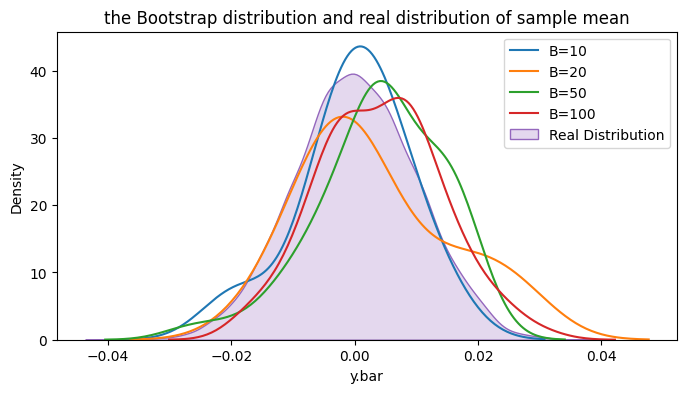

In [46]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from numpy.random import default_rng

# Generate a sample following normal distribution with mean 0 and std 1
rng = default_rng()
n=10000
normal_dist = rng.normal(0, 1, size = n)

# Generate the population distribution, the std of which = std/sqrt(n)
# This is to serve as a reference against Bootstrap distribution
normal_dist_ref = rng.normal(0, (1/np.sqrt(n)), size = n)

# Use Bootstrap method to estimate the mean of the population
bootstrap_mean1 = []#B=10
bootstrap_mean2 = []#B=20
bootstrap_mean3 = []#B=50
bootstrap_mean4 = []#B=100

def bootstrap_function(bootstrap_mean, B):
    for i in range(B):
        bootstrap_sample = rng.choice(normal_dist, size=n, replace=True)
        bootstrap_mean.append(np.mean(bootstrap_sample))
    return bootstrap_mean

bootstrap_mean1 = bootstrap_function(bootstrap_mean1,10)
bootstrap_mean2 = bootstrap_function(bootstrap_mean2,20)
bootstrap_mean3 = bootstrap_function(bootstrap_mean3,50)
bootstrap_mean4 = bootstrap_function(bootstrap_mean4,100)


# Obtain the default palette of Seaborn for line color
palette = sns.color_palette()

# Create a KDE plot of the bootstrap means
plt.figure(figsize=(8, 4))
sns.kdeplot(bootstrap_mean1, color=palette[0], label='B=10')
sns.kdeplot(bootstrap_mean2, color=palette[1], label='B=20')
sns.kdeplot(bootstrap_mean3, color=palette[2], label='B=50')
sns.kdeplot(bootstrap_mean4, color=palette[3], label='B=100')
sns.kdeplot(normal_dist_ref,color=palette[4], fill=True, label='Real Distribution')
plt.title("the Bootstrap distribution and real distribution of sample mean")
plt.xlabel("y.bar")
plt.ylabel("Density")
plt.legend()
plt.show()

In [5]:
!pip install scikit-learn
from sklearn.datasets import load_diabetes
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import BaggingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# 加载数据集
diabetes = load_diabetes()
X, y = diabetes.data, diabetes.target

# 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 定义基础模型
base_model = LinearRegression()

# 定义Bagging算法模型
bagging_model = BaggingRegressor(base_estimator=base_model, n_estimators=10, random_state=42)

# 训练模型
bagging_model.fit(X_train, y_train)

# 在测试集上进行预测
y_pred = bagging_model.predict(X_test)

# 计算均方误差
mse = mean_squared_error(y_test, y_pred)
print("Bagging算法的均方误差为: {:.2f}".format(mse))

Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 23.0 -> 23.1.2
[notice] To update, run: /Applications/Xcode.app/Contents/Developer/usr/bin/python3 -m pip install --upgrade pip
Bagging算法的均方误差为: 2884.15


/Users/gongshukai/Library/Python/3.9/lib/python/site-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


# 第五章：数据可视化

## 散点图

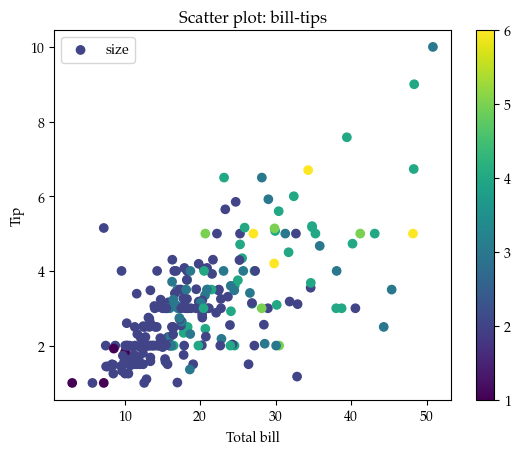

In [35]:
import pandas as pd#用来读xlsx/csv文件
import matplotlib
import matplotlib.pyplot as plt
data=pd.read_csv("tips.csv")
matplotlib.rcParams['font.family']='Palatino'
plt.scatter(data['total_bill'],data['tip'],c=data['size'],marker="o")#画散点图
plt.title("Scatter plot: bill-tips")#图表标题
plt.xlabel('Total bill')#x轴标签
plt.ylabel('Tip')#y轴标签
plt.legend(loc="upper left",labels=['size'])#图例
plt.colorbar()#色温图

## 画折线图

Text(0, 0.5, 'Tip')

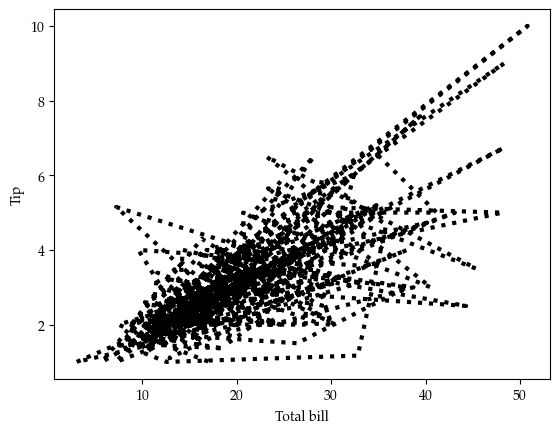

In [36]:
plt.plot(data['total_bill'],data['tip']#画折线图
        ,linestyle=":",linewidth=3,color="black")#分别是设置线的样式，线的宽度，线的颜色
plt.xlabel('Total bill')#x轴标签
plt.ylabel('Tip')#y轴标签

## 带95%置信区间的折线图

Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 23.0 -> 23.1
[notice] To update, run: /Applications/Xcode.app/Contents/Developer/usr/bin/python3 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


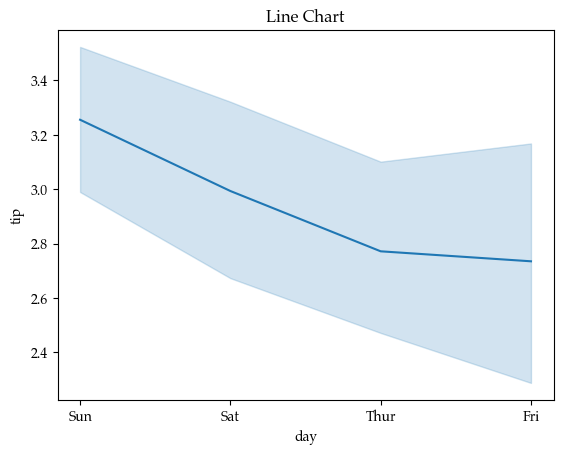

In [37]:
%pip install seaborn
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
 
data = pd.read_csv("tips.csv")# 绘制折线图，会自动添加95%置信区间，返回matplotlib axes
ax = sns.lineplot(x='day', y='tip', data=data)# 添加图标题
ax.set_title('Line Chart')
plt.show()

## 折线图（有数据标识+可缩放）

In [38]:
import plotly.express as px
import pandas as pd
data = pd.read_csv("tips.csv")#绘制折线图
fig = px.line(data, y='tip', color='sex')
fig.show()

ModuleNotFoundError: No module named 'plotly'

## 有滑动条的折线图（交互式折线图）

In [ ]:
# 添加滑动条
import plotly.graph_objects as px
import pandas as pd
data = pd.read_csv("tips.csv")
plot = px.Figure(data=[px.Scatter(
                    y=data['tip'],
                    mode='lines')])

plot.update_layout(
    xaxis=dict(
        rangeselector=dict(buttons=list([dict(count=1,step="day",stepmode="backward"),])),
        rangeslider=dict(visible=True),
    )
)
 
plot.show()

## 画条形图(Histogram)

Text(0, 0.5, 'Frequency')

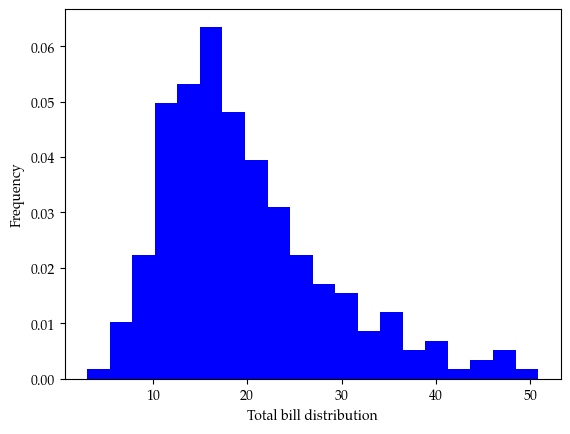

In [ ]:
plt.hist(data['total_bill'],bins=20,density=True,histtype="bar",color="blue")
plt.xlabel("Total bill distribution")
plt.ylabel("Frequency")

## 使用seaborn绘制条形图

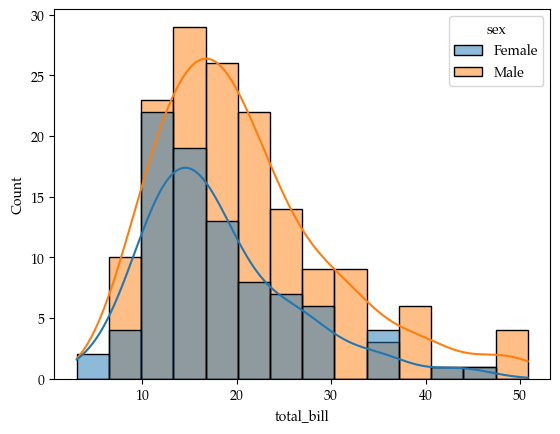

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
 
data = pd.read_csv("tips.csv")#绘制条形图，并且绘制
ax = sns.histplot(x='total_bill', data=data, kde=True, hue='sex')#存储结果
fig = ax.get_figure()
fig.savefig('output.png')
plt.show()